### Bulldozer price regression
* Problem:
  - Trying to predict bulldozer prices in the future based on previous bulldozer sales
* Evaluation:
  - RMSLE: root mean squared log error

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the training and validation sets

In [2]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False) #To avoid warning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

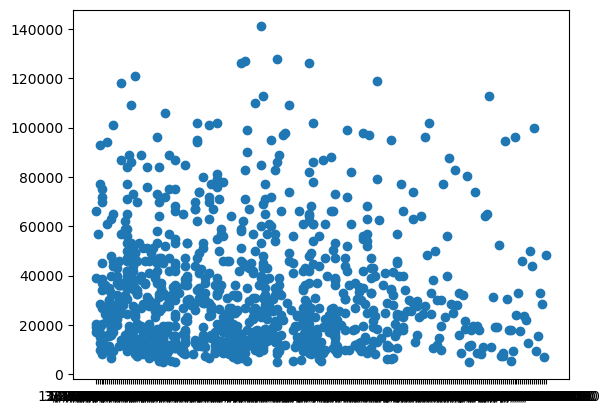

In [5]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<Axes: >

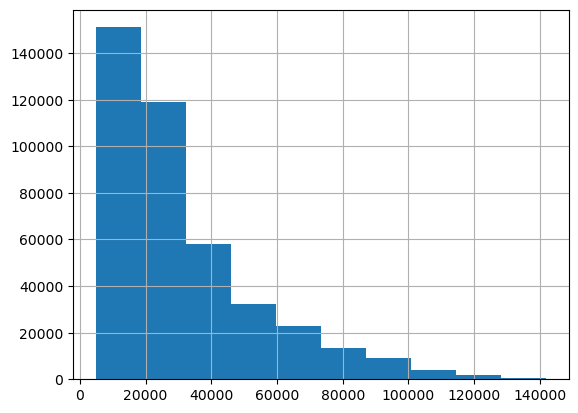

In [6]:
df["SalePrice"].hist()

### Parsing Dates
* Telling pandas which columns have dates in them
* Using `parse_date`

# Re-Importing 

In [7]:
df = pd.read_csv("data/TrainAndValid.csv",low_memory=False,parse_dates=["saledate"])

In [8]:
df["saledate"].dtype # datetime64[ns]

dtype('<M8[ns]')

# Re-Plotting

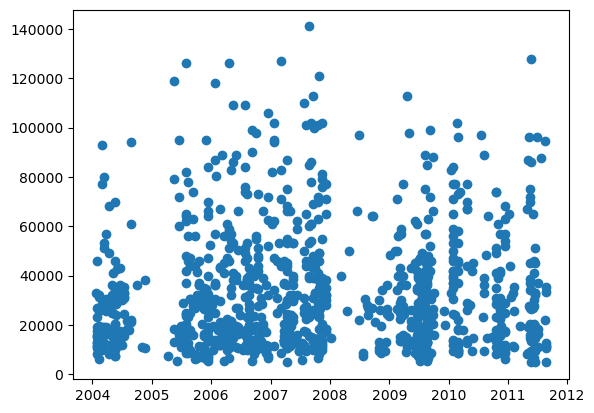

In [9]:
fig,ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [10]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Sorting data frame by saledate

In [11]:
df.sort_values(by = ["saledate"],inplace=True,ascending=True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Making a copy of the original dataframe, for local working backup

In [12]:
df_tmp = df.copy()

### Feature Engineering
* Add datetime parameters for saledate column
* i.e. inferring more data from the datetime objects

In [13]:
df_tmp["saleYear"] = df_tmp["saledate"].dt.year
df_tmp["saleMonth"] = df_tmp["saledate"].dt.month
df_tmp["saleDay"] = df_tmp["saledate"].dt.day
df_tmp["saleDayOfWeek"] = df_tmp["saledate"].dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp["saledate"].dt.dayofyear

In [14]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


### Remove saledate column

In [15]:
df_tmp.drop(["saledate"],axis=1,inplace=True)

In [16]:
df_tmp["state"].value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Modelling

## Dealing with missing entries and numeric values
* Converting strings to pandas categories

In [17]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"]) # string is object here

True

* Find columns that contain strings

In [18]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


* Changing the data type to category

In [19]:
for label,content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [20]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   object  
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  object  
 12  fiModelSeries             58667 non-null   object  
 13  fiModelDescriptor         748

In [21]:
df_tmp["state"].cat.codes # Checking category codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### missing data ratios

In [22]:
df_tmp.isna().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Saving changes to data to a new csv

In [23]:
df_tmp.to_csv("data/train_tmp.csv",index=False)

In [4]:
df_tmp = pd.read_csv("data/train_tmp.csv",low_memory=False)

## Filling missing values

* Numeric values first

In [5]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


* Find which have null values

In [6]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


* Filling with median

In [7]:
for label,content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            #Adding this columnto account for the fact that a value was missing before processing, to preserve information
            df_tmp[label+ "_is_missing"] = pd.isnull(content)
            # Filling with median, since it is more robust to outliers!
            df_tmp[label] = content.fillna(content.median())

In [8]:
df_tmp["auctioneerID"].isna().sum(), df_tmp["MachineHoursCurrentMeter"].isna().sum()

(0, 0)

In [9]:
df_tmp["auctioneerID_is_missing"].value_counts() #counting how many were filled

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [10]:
df_tmp["MachineHoursCurrentMeter_is_missing"].value_counts() #counting how many were filled

MachineHoursCurrentMeter_is_missing
True     265194
False    147504
Name: count, dtype: int64

* Filling the rest of the missing values

* Seeing which non numeric columns have missing values

In [11]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [12]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

## Turning categorical variables into numbers wnd then fill the missing

In [13]:
for label,content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Adding binary column
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories to number ,ADD PLUS ONE!!!, a missing value of a category object is -1, we want it to be ZERO, all positive 
        # Effectively , zero marks a missing value now
        df_tmp[label] = pd.Categorical(content).codes+1

In [14]:
df_tmp.shape

(412698, 103)

In [15]:
df_tmp.isna().sum().sum() # Nothing more missing

0

# Modelling

In [16]:
from sklearn.ensemble import RandomForestRegressor
state = 42

In [17]:
%%time 
# Instantiate model
model = RandomForestRegressor(n_jobs = -1,random_state=state)

# Fit the model
X_train = df_tmp.drop(["SalePrice"],axis =1)
y_train = df_tmp["SalePrice"]
model.fit(X_train,y_train)

CPU times: total: 14min 43s
Wall time: 2min 5s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [18]:
model.score(X_train,y_train) #Normal R^2! On training set too!

0.9875468079970562

# Splittiing the data: Into train and validation sets
* According to kaggle, validation set is the year 2012

In [19]:
df_val = df_tmp[df_tmp["saleYear"] == 2012]
df_train = df_tmp[df_tmp["saleYear"] != 2012]

In [20]:
len(df_val),len(df_train)

(11573, 401125)

## Splitting Data into X and y

In [21]:
X_train,y_train = df_train.drop(["SalePrice"],axis=1),df_train["SalePrice"]
X_valid,y_valid = df_val.drop(["SalePrice"],axis=1),df_val["SalePrice"]
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

# Note: 
* Here we filled missing values before splitting, meaning there exists leakage from validation to training set still! That is why both should be processed 
    seperately

# Custom evaluation function

In [22]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score
# We need the root of mean_squared_log_error though!

In [23]:
def rmsle(y_test,y_preds):
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

### Function to evaluate model on few different levels

In [24]:
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

# Reducing the data for tuning hyper parameters, to decrease time
* With random forest , we have a max samples param!

In [25]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=state,
                             max_samples=20000)

In [26]:
%%time
model.fit(X_train,y_train)

CPU times: total: 1min
Wall time: 8.46 s


RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=42)

In [27]:
show_scores(model)

{'Training MAE': 5047.9944919164855,
 'Valid MAE': 6754.1377611682365,
 'Training RMSLE': 0.23695842660674307,
 'Valid RMSLE': 0.27792674678471974,
 'Training R^2': 0.8833629837266058,
 'Valid R^2': 0.8501458046953286}

## Hyper parameter tuning
* Randomized Search CV and Grid Search CV

In [61]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

* Grid definition

In [95]:
rf_grid = {"n_estimators": [125,150,175],
          "min_samples_leaf": [1,3],
          "max_features": [1.0,"sqrt"],
          "max_samples":[15000,20000]}

In [96]:
# Instantiation
rs_model = GridSearchCV(estimator=RandomForestRegressor(n_jobs =-1,random_state=42),
                             param_grid=rf_grid,
                             cv =5,
                             verbose=1)

In [97]:
%%time
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 5min 27s
Wall time: 14min 57s


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_features': [1.0, 'sqrt'],
                         'max_samples': [15000, 20000],
                         'min_samples_leaf': [1, 3],
                         'n_estimators': [125, 150, 175]},
             verbose=1)

In [98]:
rs_model.best_params_

{'max_features': 1.0,
 'max_samples': 20000,
 'min_samples_leaf': 1,
 'n_estimators': 175}

## Scoring the new model with best parameters

In [99]:
show_scores(rs_model)

{'Training MAE': 5029.208670072563,
 'Valid MAE': 6728.160889261952,
 'Training RMSLE': 0.23619829244446552,
 'Valid RMSLE': 0.27726667503356267,
 'Training R^2': 0.8841672813237575,
 'Valid R^2': 0.8507584984019654}

## Plotting scores

In [110]:
def plot_scores(metrics):
    # Modify the dictionary to divide MAE values by 10,000
    updated_metrics = {key: (value / 10000 if 'MAE' in key else value) for key, value in metrics.items()}

    # Fixing the label list comprehension
    labels = [key + " (Divided by 10k)" if 'MAE' in key else key for key in updated_metrics.keys()]
    values = list(updated_metrics.values())

    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Metric')
    plt.title('Training and Validation Metrics')

    # Display the plot
    plt.show()

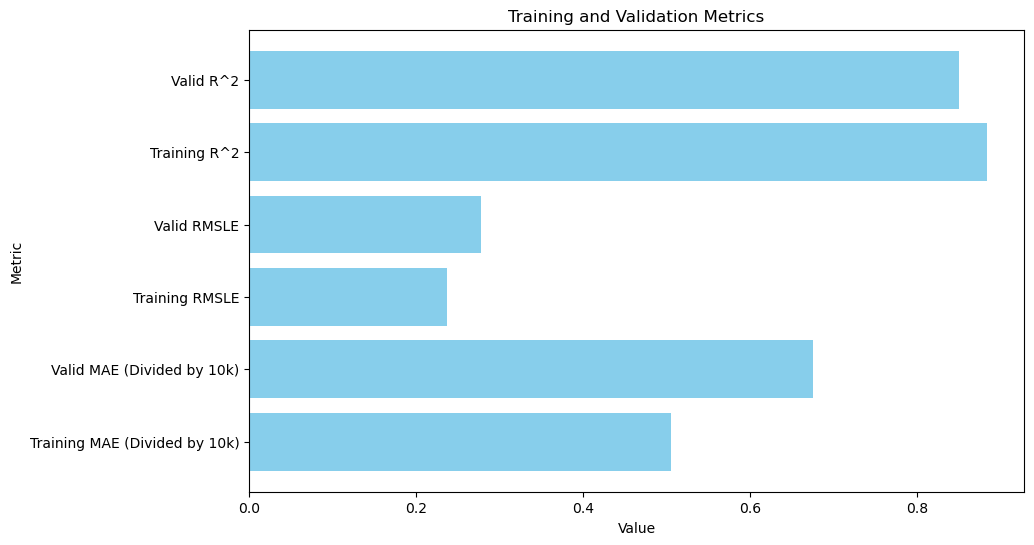

In [111]:
plot_scores(show_scores(model)) # Previous model

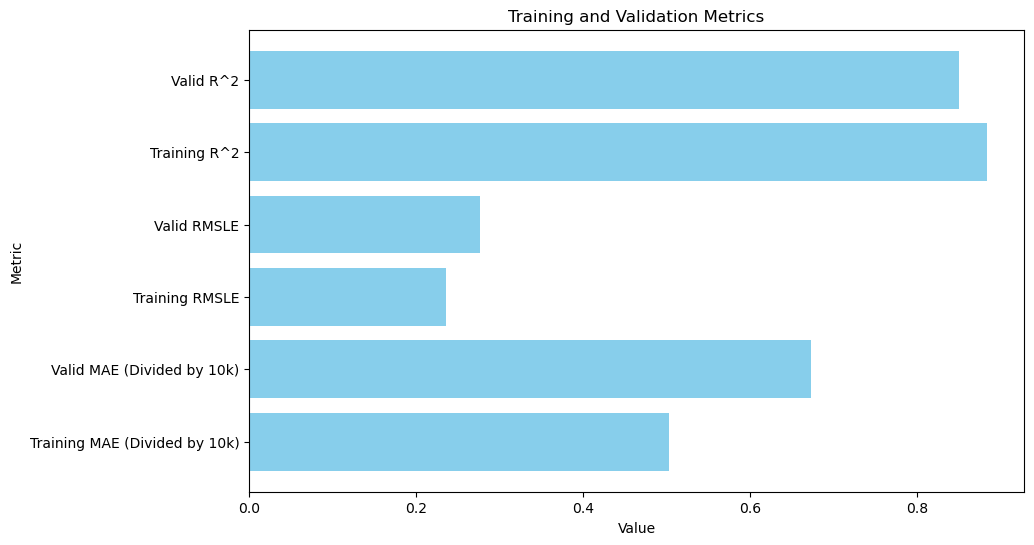

In [112]:
plot_scores(show_scores(rs_model)) # New Model

## Trying best parameters of course
* Note: retraining without a 20k subset

In [116]:
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   random_state=42,
                                   n_jobs=-1,
                                   max_samples=None)

In [117]:
%%time 
ideal_model.fit(X_train,y_train)

CPU times: total: 2min 34s
Wall time: 23.4 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [118]:
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.2452416398953833,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

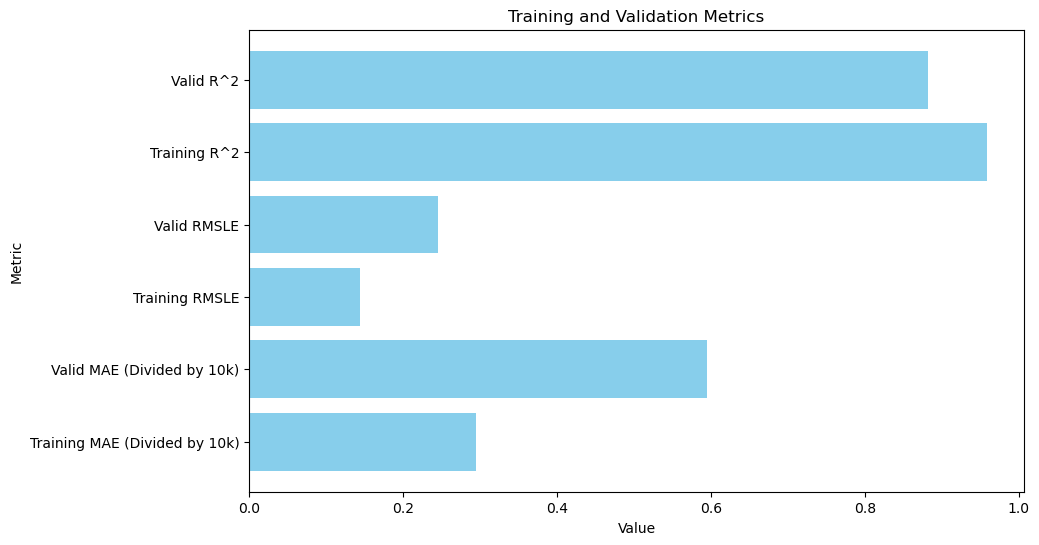

In [119]:
plot_scores(show_scores(ideal_model)) # Ideal Model

## Trying my ideal model
* On the entire data

In [121]:
gs_model = rs_model.best_estimator_
gs_model.set_params(max_samples = None)
gs_model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=175, n_jobs=-1, random_state=42)

In [123]:
show_scores(gs_model) # Grid Search Model

{'Training MAE': 1566.8852181952545,
 'Valid MAE': 6110.5061613854905,
 'Training RMSLE': 0.08353901318215701,
 'Valid RMSLE': 0.2551050422089509,
 'Training R^2': 0.9877686056422853,
 'Valid R^2': 0.8731570643990114}

## Conclusions:
* My model has ridiculous overfitting

# Doing cross validation with respect to RMSLE

In [125]:
from sklearn.metrics import make_scorer

custom_scorer = make_scorer(rmsle, greater_is_better=False)  # Set to False if lower score is better


In [221]:
rf_grid = {"n_estimators": [30,45],
          "min_samples_leaf": [1,3],
           "min_samples_split":[13,14],
          "max_features": [0.5],
          "max_samples":[30000]}

In [223]:
special_scoring_model = GridSearchCV(estimator=RandomForestRegressor(n_jobs =-1,random_state=42),
                             param_grid=rf_grid,
                             cv =6,
                             scoring=custom_scorer,
                             verbose=2)

In [224]:
%%time
special_scoring_model.fit(X_train,y_train)

Fitting 6 folds for each of 8 candidates, totalling 48 fits
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_samples_split=13, n_estimators=30; total time=   2.4s
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_samples_split=13, n_estimators=30; total time=   2.4s
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_samples_split=13, n_estimators=30; total time=   2.3s
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_samples_split=13, n_estimators=30; total time=   2.5s
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_samples_split=13, n_estimators=30; total time=   2.3s
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_samples_split=13, n_estimators=30; total time=   2.3s
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_samples_split=13, n_estimators=45; total time=   3.4s
[CV] END max_features=0.5, max_samples=30000, min_samples_leaf=1, min_sa

GridSearchCV(cv=6, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_features': [0.5], 'max_samples': [30000],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [13, 14],
                         'n_estimators': [30, 45]},
             scoring=make_scorer(rmsle, greater_is_better=False, response_method='predict'),
             verbose=2)

### Instantiating special model to train on the entire data

In [225]:
special_scoring_model.best_params_

{'max_features': 0.5,
 'max_samples': 30000,
 'min_samples_leaf': 3,
 'min_samples_split': 14,
 'n_estimators': 45}

In [226]:
special_ideal_model = RandomForestRegressor(n_estimators=45,
                                   min_samples_leaf=3,
                                   min_samples_split=13,
                                   max_features=0.5,
                                   random_state=42,
                                   n_jobs=-1,
                                   max_samples=None)

In [227]:
%%time 
special_ideal_model.fit(X_train,y_train)

CPU times: total: 2min 39s
Wall time: 22.7 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=13, n_estimators=45, n_jobs=-1,
                      random_state=42)

In [228]:
show_scores(special_ideal_model) # Special Grid Search Model

{'Training MAE': 3082.678394679331,
 'Valid MAE': 5932.586375582368,
 'Training RMSLE': 0.1522821543803335,
 'Valid RMSLE': 0.24429294872828147,
 'Training R^2': 0.9534366416061912,
 'Valid R^2': 0.8820139385859522}

## Conclusions: I got better result by 0.001